In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

price 이상치 어떻게 처리할지!!


없앨 칼럼
id
listing_url
scrape_id
last_scraped
[0]~[3]

4 source : 이용 가능한 것으로 확인

name
description
[5, 6]

8 picture_url
9 host_id
10 host_url
11 host_name
12 host_since
13 host_location
14 host_about (자기소개)

19  host_thumbnail_url                            24342 non-null  object 
20  host_picture_url                              24342 non-null  object 
21  host_neighbourhood                            6874 non-null   object
22  host_listings_count                           24342 non-null  float64
23  host_total_listings_count                     24342 non-null  float64
24  host_verifications                            24342 non-null  object
-> 연락 수단

27  neighbourhood                                 14048 non-null  object 
-> 결측치 다수 존재

28  neighbourhood_cleansed                        25297 non-null  object 
29  neighbourhood_group_cleansed                  0 non-null      float64

36  bathrooms_text                                25251 non-null  object 

41  minimum_nights                                25297 non-null  int64  
42  maximum_nights                                25297 non-null  int64  
43  minimum_minimum_nights                        25284 non-null  float64
44  maximum_minimum_nights                        25284 non-null  float64
45  minimum_maximum_nights                        25284 non-null  float64
46  maximum_maximum_nights                        25284 non-null  float64

47  minimum_nights_avg_ntm                        25297 non-null  float64
48  maximum_nights_avg_ntm                        25297 non-null  float64
-> 최소 n박 수 평균, 최대 n박 수 평균

49  calendar_updated                              0 non-null      float64

50  has_availability                              25186 non-null  object 
51  availability_30                               25297 non-null  int64  
52  availability_60                               25297 non-null  int64  
53  availability_90                               25297 non-null  int64  
54  availability_365                              25297 non-null  int64

55  calendar_last_scraped                         25297 non-null  object 

-
59  availability_eoy                              25297 non-null  int64  
60  number_of_reviews_ly                          25297 non-null  int64  
61  estimated_occupancy_l365d                     25297 non-null  int64
-> 추정 점유율...
62  estimated_revenue_l365d                       23260 non-null  float64
-- 추정 수익...
-

63  first_review                                  21724 non-null  object 
64  last_review                                   21724 non-null  object 

72  license                                       25278 non-null  object 
-> 라이선스 번호

74  calculated_host_listings_count                25297 non-null  int64  
75  calculated_host_listings_count_entire_homes   25297 non-null  int64  
76  calculated_host_listings_count_private_rooms  25297 non-null  int64  
77  calculated_host_listings_count_shared_rooms   25297 non-null  int64  




애매

7 neighborhood_overview : 호스트가 직접 설명해둔 근처 볼거리? -> 처리 애매

15 host_response_time   : 답장 평균 시간
16 host_response_rate   : 답장률
17 host_acceptance_rate : 호스트가 예약 요청을 수락하는 비율


25  host_has_profile_pic                          24342 non-null  object
-> 호스트 사진이 있고 없고
--> 답장 시간, 답장률과의 상관관계??


57  number_of_reviews_ltm                         25297 non-null  int64  
-> 1년 동안 리뷰 개수
58  number_of_reviews_l30d                        25297 non-null  int64
-> 최근 30일 간 리뷰 개수  


73  instant_bookable                              25297 non-null  object
-> 호스트가 예약 요청을 수락하지 않아도 게스트가 자동으로 목록을 예약할 수 있는지 여부

78  reviews_per_month                             21724 non-null  float64
-> 매월 평균 리뷰 수



꼭

18 host_is_superhost
결측치 2천

26 host_identity_verified 24342
955개 NaN -> f 처리?

30  latitude                                      25297 non-null  float64
31  longitude                                     25297 non-null  float64
경도 위도

32  property_type                                 25297 non-null  object 
33  room_type                                     25297 non-null  object 
34  accommodates                                  25297 non-null  int64  
35  bathrooms                                     23253 non-null  float64
37  bedrooms                                      25040 non-null  float64
38  beds                                          23255 non-null  float64
39  amenities                                     25297 non-null  object 
40  price                                         23260 non-null  object
-> daily price in local currency.


56  number_of_reviews                             25297 non-null  int64  
-> 전체 리뷰 개수

65  review_scores_rating                          21724 non-null  float64
66  review_scores_accuracy                        21720 non-null  float64
67  review_scores_cleanliness                     21720 non-null  float64
68  review_scores_checkin                         21720 non-null  float64
69  review_scores_communication                   21720 non-null  float64
70  review_scores_location                        21720 non-null  float64
71  review_scores_value                           21720 non-null  float64


In [2]:
# 1. 데이터 로드
tokyo_df = pd.read_csv('listings.csv.gz', compression='gzip')

In [3]:
index_list = [0, 18, 26, 30, 31, 32, 33, 34, 35, 37, 38, 39, 56, 65, 66, 67, 68, 69, 70, 71, 40]
# ML 고려해 price 칼럼 마지막에 추가

df = tokyo_df.iloc[:, index_list]
df.head()
df.tail()

,id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
25292,1450456585473146267,t,t,35.689930,139.732080,Entire rental unit,Entire home/apt,4,1.0,1.0,...,"[""Elevator"", ""Hair dryer"", ""Lockbox"", ""Stove"",...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$12,306.00"
25293,1450457966225777452,f,t,35.679380,139.680590,Entire home,Entire home/apt,11,1.0,4.0,...,"[""Bidet"", ""Cooking basics"", ""Body soap"", ""Stov...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$40,732.00"
25294,1450486295623882750,f,t,35.650851,139.730603,Entire home,Entire home/apt,7,1.0,3.0,...,"[""Record player"", ""Private patio or balcony"", ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$64,436.00"
25295,1450507625401277136,f,t,35.659110,139.691790,Entire rental unit,Entire home/apt,2,1.0,1.0,...,"[""Bidet"", ""Room-darkening shades"", ""Cooking ba...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$17,046.00"
25296,1450585044643217878,f,t,35.713724,139.708993,Entire rental unit,Entire home/apt,2,1.0,1.0,...,"[""Hair dryer"", ""Fire extinguisher"", ""Lockbox"",...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$19,400.00"


In [13]:
tokyo_df[tokyo_df['id']==40953417]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4356,40953417,https://www.airbnb.com/rooms/40953417,20250627030533,2025-06-30,city scrape,3min->JR Oimachi Station/Japanese Superior Room,"[3-minute walk from JR Oimachi Station, Centra...",* Tomb of Yama contents hall: 5 minutes walk f...,https://a0.muscache.com/pictures/c2525e86-54af...,311084939,...,NaN,NaN,NaN,Hotels and Inns Business Act | 東京都品川区品川保健所長 渡辺...,f,1,0,1,0,NaN


In [4]:
# price 칼럼 float형 변환
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)

# 화폐 단위 엔 -> 원
# df['price']/=1000

C:\Users\Playdata\AppData\Local\Temp\ipykernel_18180\3921338220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)


In [5]:
# 2. 데이터 구조 및 기초 통계 확인

df.info()
# superhost, host identity인증 여부
# bathrooms, bedrooms, beds
# review_scores_~ 25297 중 21720
# price

df.describe()
# 리뷰 점수는 0~5점

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           25297 non-null  int64  
 1   host_is_superhost            23676 non-null  object 
 2   host_identity_verified       24342 non-null  object 
 3   latitude                     25297 non-null  float64
 4   longitude                    25297 non-null  float64
 5   property_type                25297 non-null  object 
 6   room_type                    25297 non-null  object 
 7   accommodates                 25297 non-null  int64  
 8   bathrooms                    23253 non-null  float64
 9   bedrooms                     25040 non-null  float64
 10  beds                         23255 non-null  float64
 11  amenities                    25297 non-null  object 
 12  number_of_reviews            25297 non-null  int64  
 13  review_scores_ra

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,2.529700e+04,25297.000000,25297.000000,25297.000000,23253.000000,25040.000000,23255.000000,25297.000000,21724.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,2.326000e+04
mean,8.785292e+17,35.698085,139.737069,4.418824,1.156453,1.406350,2.935068,36.794837,4.723077,4.761324,4.708854,4.789903,4.834242,4.713930,4.666555,2.141819e+04
std,5.351385e+17,0.042667,0.072960,2.927961,0.541552,1.072037,2.330206,66.044810,0.338028,0.309306,0.367070,0.291071,0.280005,0.297616,0.348280,8.393381e+04
min,1.976770e+05,35.520940,139.081322,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000e+03
25%,5.596254e+17,35.687170,139.699210,2.000000,1.000000,1.000000,1.000000,3.000000,4.630000,4.680000,4.600000,4.720000,4.790000,4.610000,4.560000,9.463000e+03
50%,1.105401e+18,35.704122,139.727821,4.000000,1.000000,1.000000,2.000000,17.000000,4.800000,4.830000,4.800000,4.870000,4.910000,4.770000,4.730000,1.400000e+04
75%,1.296093e+18,35.723532,139.793260,6.000000,1.000000,2.000000,4.000000,43.000000,4.940000,4.950000,4.940000,4.970000,5.000000,4.900000,4.870000,2.190375e+04
max,1.450585e+18,35.840764,139.914020,16.000000,19.500000,50.000000,50.000000,3506.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.711110e+06


##### 결측치, 이상치 처리



1. price max인 숙소: https://www.airbnb.com/rooms/1152660137338301863
   이외에도 host가 일부러 예약을 받지 않으려고 가격을 높게 설정하는 경우 존재. -> (1) 여행객들을 위한 가격 예측이므로 상식적인 값에서 벗어나는 가격 row는 모두 삭제.

2. bathrooms, bedrooms, beds 결측치
   (1) 이중 하나라도 NaN이면 row 삭제 -> 23239개 row 존재

3. superhost, host_identity_verified 결측치

4. review_scores_~ 결측치

5. price 결측치 (중요)

In [6]:
# 숫자형 칼럼 따로 저장
df_nu = df.select_dtypes(include=['float', 'int'])
df_nu = df_nu.drop('id', axis=1)
df_nu

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,35.706170,139.745120,3,1.0,0.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0
1,35.706254,139.745134,8,1.0,2.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0
2,35.698540,139.780864,4,2.0,2.0,2.0,24,4.42,4.38,4.71,4.58,4.88,4.83,4.38,14550.0
3,35.755420,139.732600,8,1.0,3.0,6.0,15,4.73,4.87,4.60,4.73,4.87,4.60,4.73,22012.0
4,35.715503,139.808758,3,1.0,1.0,1.0,17,5.00,5.00,5.00,4.94,5.00,4.82,4.94,15429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25292,35.689930,139.732080,4,1.0,1.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12306.0
25293,35.679380,139.680590,11,1.0,4.0,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40732.0
25294,35.650851,139.730603,7,1.0,3.0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64436.0
25295,35.659110,139.691790,2,1.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17046.0


In [7]:
# 2 bathrooms, bedrooms, beds의 NaN row 삭제

df_im = df[['bathrooms', 'bedrooms', 'beds']].dropna()
df_im.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23239 entries, 0 to 25296
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  23239 non-null  float64
 1   bedrooms   23239 non-null  float64
 2   beds       23239 non-null  float64
dtypes: float64(3)
memory usage: 726.2 KB


4. 데이터 시각화를 통한 탐색

 1. review score 칼럼 간의 상관관계
    rating과 그 외 칼럼의 계수값 비교적 높음 + accuracy, value

In [10]:
# review score 상관관계
df_score = df_im.iloc[:, 13:21]

# NaN 처리
df_score = df_score.dropna()


# 상관관계 heatmap

# 상관계수 계산
corr = df_score.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr.sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

KeyError: 'price'

<Figure size 800x600 with 0 Axes>

In [9]:
df.nlargest(10, 'price')

,id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
13884,1152660137338301863,f,t,35.701169,139.711497,Entire rental unit,Entire home/apt,4,1.0,1.0,...,"[""Hair dryer"", ""Clothing storage"", ""Fire extin...",1,5.00,5.00,5.00,5.00,5.00,5.0,5.00,8711110.0
14693,1181748125859376165,t,t,35.664629,139.693979,Entire serviced apartment,Entire home/apt,5,1.0,1.0,...,"[""Bidet"", ""Room-darkening shades"", ""Private pa...",20,4.95,5.00,4.95,4.50,4.85,4.8,4.60,7154285.0
13144,1125105431762016220,t,t,35.701991,139.705128,Room in hotel,Private room,3,1.0,1.0,...,"[""Bidet"", ""Room-darkening shades"", ""Luggage dr...",84,4.94,4.89,4.96,4.95,4.98,4.9,4.87,1298263.0
17161,1249116652043941721,f,t,35.707332,139.629677,Entire rental unit,Entire home/apt,2,1.0,1.0,...,"[""Hair dryer"", ""Clothing storage"", ""Fire extin...",5,4.80,4.80,4.80,5.00,5.00,4.8,4.60,1198030.0
22691,1387438746586080632,NaN,t,35.705689,139.815216,Room in boutique hotel,Private room,3,0.0,1.0,...,"[""Hair dryer"", ""Fire extinguisher"", ""Lockbox"",...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1142154.0
16180,1225618287786473681,f,t,35.682565,139.803618,Private room in rental unit,Private room,3,0.0,1.0,...,"[""Lock on bedroom door""]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103381.0
1570,21080730,f,t,35.732780,139.779930,Room in hotel,Hotel room,2,1.0,1.0,...,"[""Air conditioning"", ""Smoke alarm"", ""Hair drye...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999999.0
4356,40953417,f,t,35.603400,139.732500,Room in hotel,Private room,5,1.0,1.0,...,"[""Air conditioning"", ""Heating"", ""Hair dryer"", ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999999.0
20943,1348311022475356717,f,t,35.737270,139.761620,Entire rental unit,Entire home/apt,10,1.0,1.0,...,"[""Bidet"", ""Room-darkening shades"", ""Body soap""...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992858.0
20941,1348289002107449827,f,t,35.735934,139.759453,Entire rental unit,Entire home/apt,7,1.0,2.0,...,"[""Wifi"", ""TV"", ""Smoke alarm"", ""Shampoo"", ""Long...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992286.0


In [42]:
price_90th_percentile = df['price'].quantile(0.9955)

# 상위 10%를 제외한 하위 90%만 필터링
df_filtered = df[df['price'] <= price_90th_percentile]

df_filtered.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,2.315500e+04,23155.000000,23155.000000,23155.000000,23147.000000,23147.000000,23149.000000,23155.000000,20006.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,23155.000000
mean,8.981162e+17,35.697925,139.736649,4.473721,1.156759,1.408908,2.937751,37.892896,4.731119,4.768710,4.717502,4.793542,4.840922,4.718094,4.673172,18435.324163
std,5.265639e+17,0.043027,0.073218,2.939345,0.541282,1.080344,2.328564,67.559849,0.321832,0.291371,0.348800,0.279873,0.262730,0.288073,0.332962,16460.834009
min,1.976770e+05,35.520940,139.081322,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1700.000000
25%,6.785094e+17,35.686994,139.698765,2.000000,1.000000,1.000000,1.000000,3.000000,4.630000,4.690000,4.610000,4.720000,4.790000,4.610000,4.570000,9438.500000
50%,1.117055e+18,35.704169,139.727220,4.000000,1.000000,1.000000,2.000000,18.000000,4.800000,4.830000,4.800000,4.870000,4.910000,4.770000,4.730000,13979.000000
75%,1.301052e+18,35.723795,139.794210,6.000000,1.000000,2.000000,4.000000,45.000000,4.940000,4.950000,4.940000,4.970000,5.000000,4.900000,4.870000,21715.000000
max,1.450585e+18,35.840764,139.914020,16.000000,19.500000,50.000000,50.000000,3506.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,300000.000000


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tower\AppData\Local\Temp\ipykernel_15884\446537468.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_need['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\tower\AppData\Local\Temp\ipykernel_15884\446537468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_need['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)


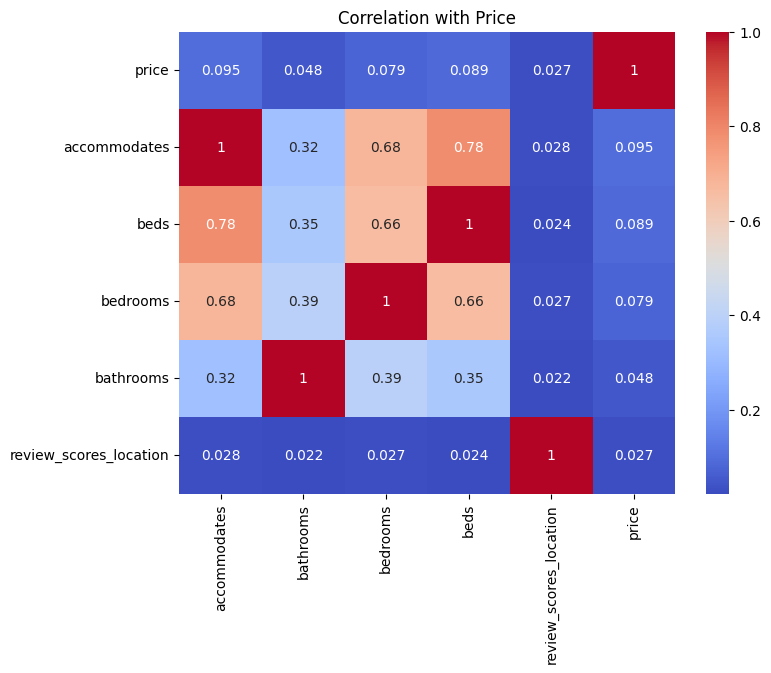

In [ ]:
# bathrooms, bedrooms, beds, accommodates 와 price 상관관계

df_hotel = df_need[df_need['room_type']=='Entire home/apt']

# 상관관계 heatmap

# price float형
df_need['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)

# 수치형 칼럼만 추출
df_nu = df_need[f_columns]
# df_nu['acommodates']=df_nu['accommodates'].astype(float)

# 상관계수 계산
corr = df_nu.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr.sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

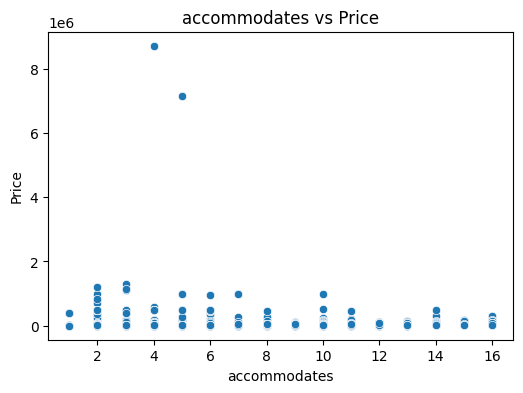

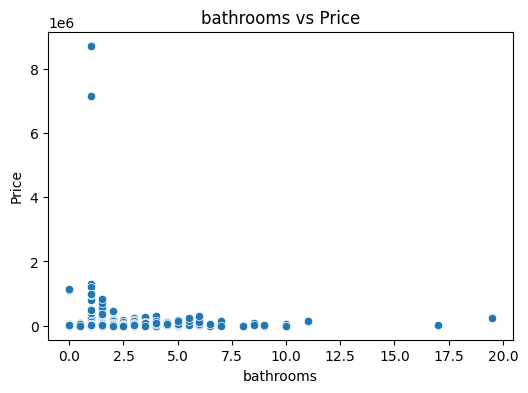

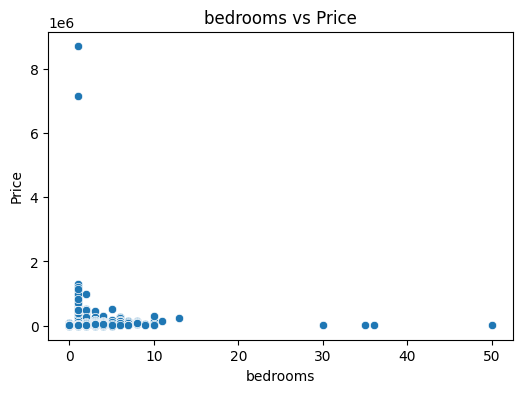

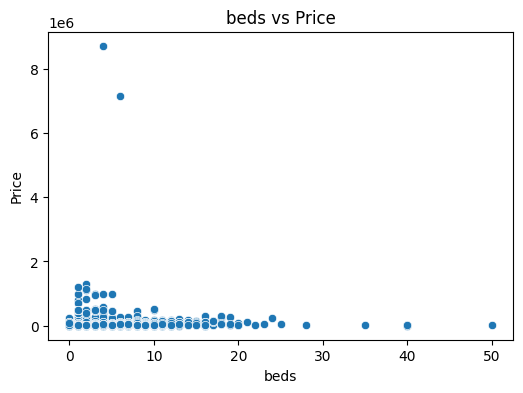

In [ ]:
# 숫자형 칼럼에 따른 가격 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_need, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

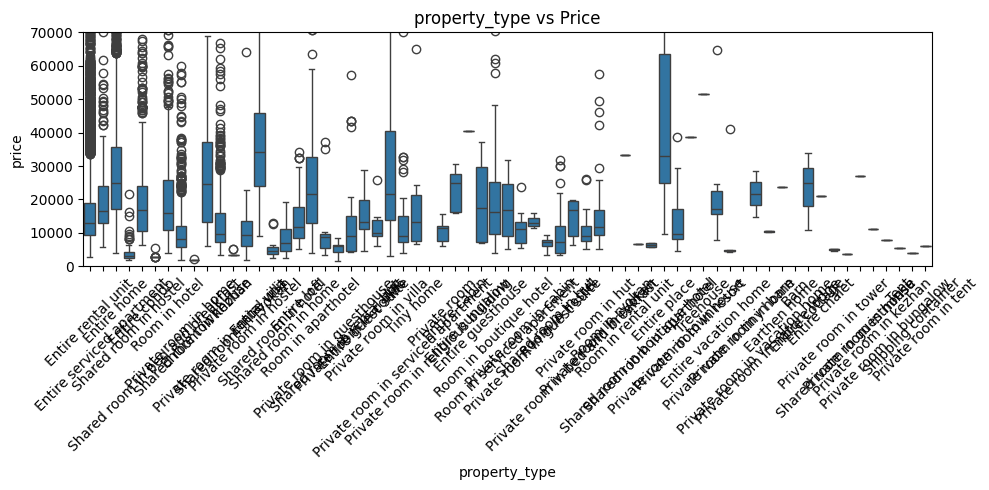

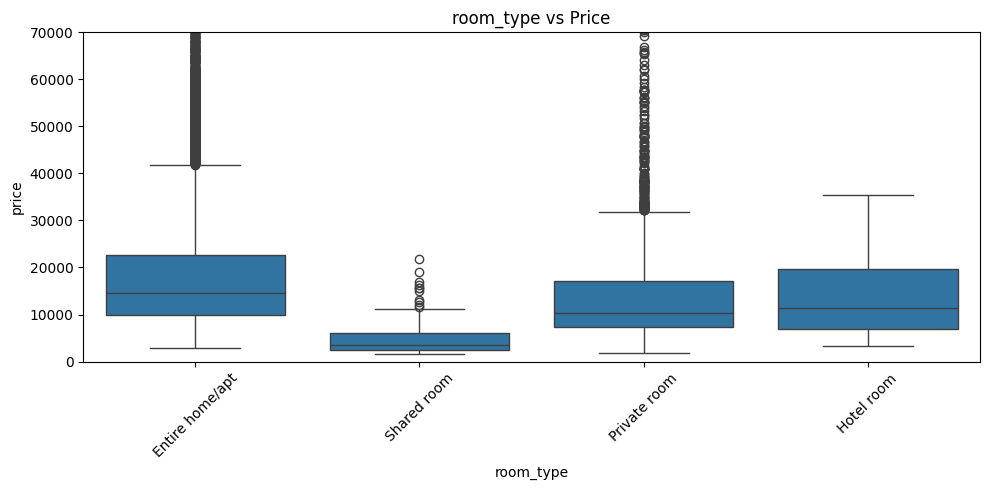

In [ ]:
# 건물, 룸 타입에 따른 박스플롯

for col in ['property_type', 'room_type']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_need, x=col, y='price')
    plt.xticks(rotation=45)
    plt.ylim(0, 70000)
    plt.title(f'{col} vs Price')
    plt.tight_layout()
    plt.show()

# apt 다양.. share room은 확연히 낮은 가격............

In [69]:
df_apt = df[df['room_type']=='Entire home/apt']

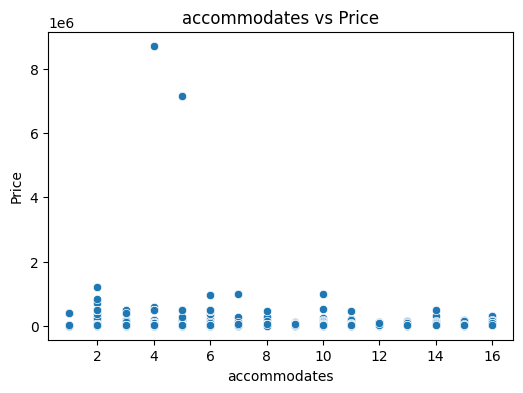

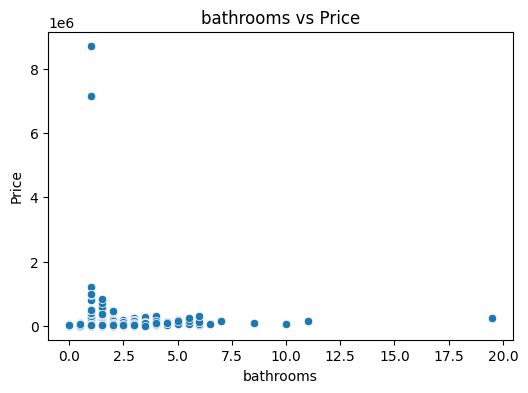

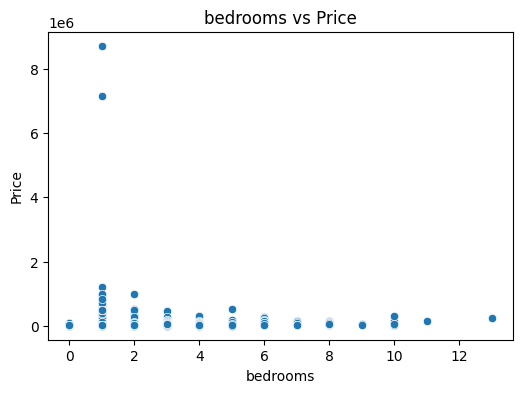

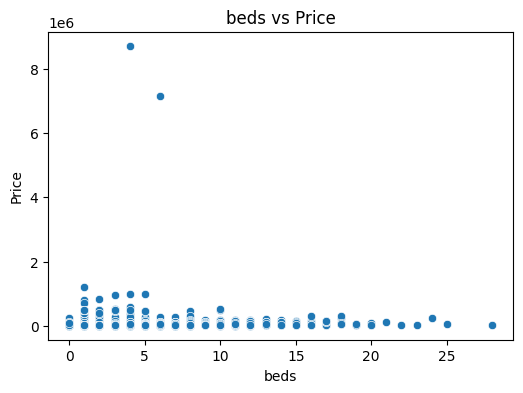

In [67]:
# 숫자형 칼럼에 따른 가격 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_apt, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

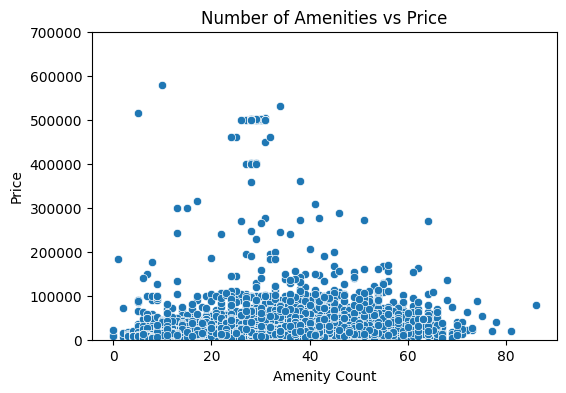

In [ ]:
# amenities 수 파악해서 price와 관계

df_need['amenity_count'] = df_need['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_need, x='amenity_count', y='price')
plt.title("Number of Amenities vs Price")
plt.xlabel("Amenity Count")
plt.ylabel("Price")
plt.ylim(0, 700000)
plt.show()
# 고르게 분포를 함 . . . . .................................... 어매니티가 몇 개든............ 고르게...

C:\Users\tower\AppData\Local\Temp\ipykernel_15884\3959616055.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geo.groupby(['lat_bin', 'lon_bin'])['price']


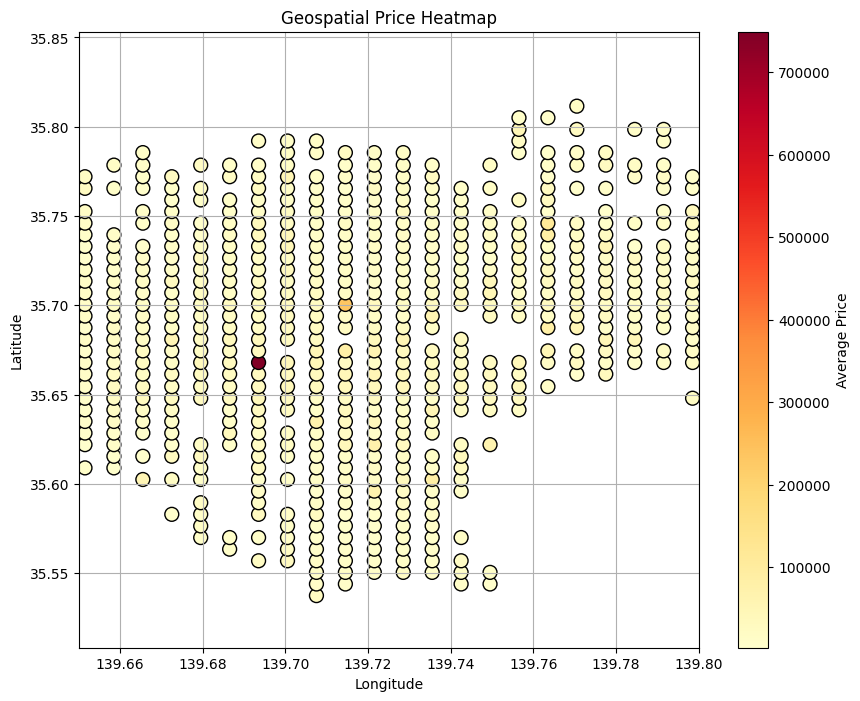

In [50]:
# 위도 경도에 따른 가격 변화~ 극적이지 않음~

df['price'] = (
    df['price']
    .astype(str)  # 혹시 숫자가 아닌 경우 대비
    .str.replace(r'[$,]', '', regex=True)  # $, , 제거
    .astype(float)  # float으로 변환
)

# 결측치 제거 (위도/경도/가격)
df_geo = df[['latitude', 'longitude', 'price']].dropna()

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 50)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 120)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.ylim(35.625, 35.775)
plt.xlim(139.65, 139.8)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19360\4047902215.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geo.groupby(['lat_bin', 'lon_bin'])['price']


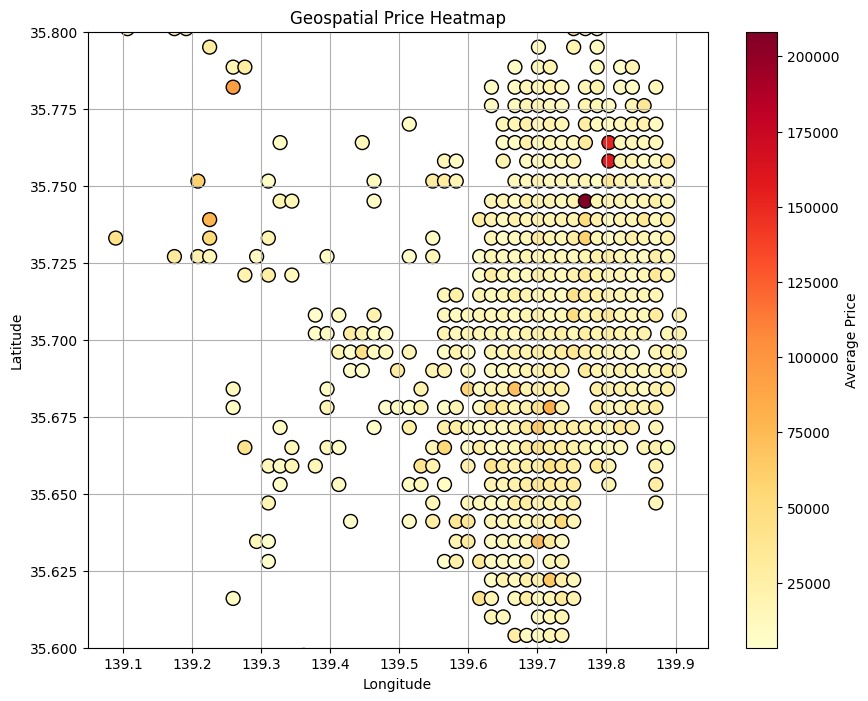

In [72]:
# 위도 경도에 따른 가격 변화~ APT~

# df['price'] = (
#     df['price']
#     .astype(str)  # 혹시 숫자가 아닌 경우 대비
#     .str.replace(r'[$,]', '', regex=True)  # $, , 제거
#     .astype(float)  # float으로 변환
# )

# 결측치 제거 (위도/경도/가격)
df_geo = df_apt[['latitude', 'longitude', 'price']].dropna()

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 50)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 50)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(35.6, 35.8)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()

In [ ]:
# 다른 자료 찾기. . .